In [154]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("../data/raw/telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df.shape

(7043, 21)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [158]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [159]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [160]:
df_gender = pd.get_dummies(df['gender'], dtype=int)

df_gender = df_gender.drop(['Male'], axis=1)
df_gender = df_gender.rename(columns= {'Female': 'Gender'})


In [161]:
dm = pd.concat([df, pd.get_dummies(df['Contract'], dtype=int), pd.get_dummies(df['PaymentMethod'], dtype=int), pd.get_dummies(df['Partner'], dtype=int)], axis=1)
dm.drop(['Contract', 'PaymentMethod', 'Partner'], axis=1)
dm = dm.drop(['No'], axis=1).rename(columns= {'Yes': 'Partner'})
dm

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Partner
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,1,0,0,0,0,1,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.5,No,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,1,0,0,0,0,0,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,0,1,0,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,1990.5,No,0,1,0,0,0,0,1,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,7362.9,No,0,1,0,0,1,0,0,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,346.45,No,1,0,0,0,0,1,0,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,306.6,Yes,1,0,0,0,0,0,1,1


In [162]:
value = " "
result = dm[dm['TotalCharges'] == value]
result


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Partner
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,,No,0,0,1,1,0,0,0,1
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,,No,0,0,1,0,0,0,1,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,,No,0,0,1,0,0,0,1,1
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,,No,0,0,1,0,0,0,1,1
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,,No,0,0,1,0,1,0,0,1
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,,No,0,0,1,0,0,0,1,1
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,,No,0,0,1,0,0,0,1,1
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,,No,0,0,1,0,0,0,1,1
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,,No,0,1,0,0,0,0,1,1
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,,No,0,0,1,0,0,0,1,1


In [163]:
dm['TotalCharges'] = np.where(dm['TotalCharges'].str.strip() == "", dm['MonthlyCharges'], dm['TotalCharges'])
dm.iloc[488]


customerID                                  4472-LVYGI
gender                                          Female
SeniorCitizen                                        0
Partner                                            Yes
Dependents                                         Yes
tenure                                               0
PhoneService                                        No
MultipleLines                         No phone service
InternetService                                    DSL
OnlineSecurity                                     Yes
OnlineBackup                                        No
DeviceProtection                                   Yes
TechSupport                                        Yes
StreamingTV                                        Yes
StreamingMovies                                     No
Contract                                      Two year
PaperlessBilling                                   Yes
PaymentMethod                Bank transfer (automatic)
MonthlyCha

In [164]:
dm['TotalCharges'] = dm['TotalCharges'].astype('float64')
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   gender                     7043 non-null   object 
 2   SeniorCitizen              7043 non-null   int64  
 3   Partner                    7043 non-null   object 
 4   Dependents                 7043 non-null   object 
 5   tenure                     7043 non-null   int64  
 6   PhoneService               7043 non-null   object 
 7   MultipleLines              7043 non-null   object 
 8   InternetService            7043 non-null   object 
 9   OnlineSecurity             7043 non-null   object 
 10  OnlineBackup               7043 non-null   object 
 11  DeviceProtection           7043 non-null   object 
 12  TechSupport                7043 non-null   object 
 13  StreamingTV                7043 non-null   objec

In [165]:
y = dm['Churn']
X = df.iloc[:, :-1]

In [166]:
counts = dm['Churn'].value_counts()
counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

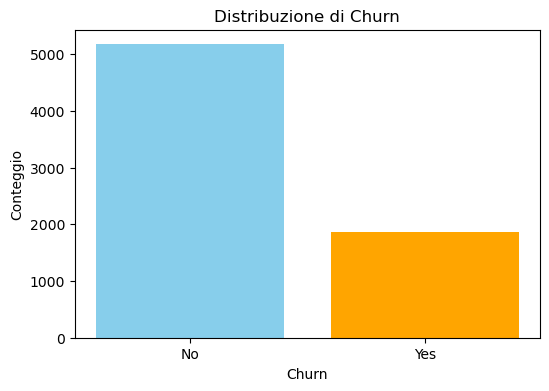

In [167]:
plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values, color=['skyblue', 'orange'])
plt.title('Distribuzione di Churn')
plt.xlabel('Churn')
plt.ylabel('Conteggio')
plt.show()
